<div style="display: flex;">
  <div style="flex: 33%;">
      <img src="https://upload.wikimedia.org/wikipedia/commons/4/43/Emblema_Universidad_de_Sevilla.png" width=150>
  </div>
  <div style="flex: 66%; margin: 1em; text-align: center;">

<h1> Máster Propio en Data Science y Big Data (IV Edición) </h1>
<h2> Arquitecturas y Paradigmas para Ciencia del Dato (APCD) </h2>

  </div>
</div>

# Primera entrega.

Una vez terminado, enviar a Javier de la Rosa mediante el sistema de mensajes de la Enseñanza Virtual usando el asunto `[APCD] - Entrega 1`. Plazo: Antes de las 23:59 del día 15 de febrero de 2024. **Cada ejercicio se puntúa de 0 a 10. Se hará la media de los 3 mejores ejercicios.**

> **Nombre**: Domingo

> **Apellidos**: Parrales de la Cruz

> **E-mail**: [REDACTED]

No cambiar el nombre al notebook ni eliminar las celdas con las salidas esperadas de cada ejercicio.
Asegúrese de que el notebook funciona correctamente tras reiniciar el kernel y ejecutar todas las celdas.

In [1]:
# Setup
!!pip install BeautifulSoup4 pandas plotly requests tweepy hug fastapi scikit-image
import json
import numpy as np
import re
import pandas as pd
import plotly.express as px
import requests
import tweepy
from bs4 import BeautifulSoup

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio 1
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
A partir de la web https://webscraper.io/test-sites/e-commerce/allinone, y usando técnias de scrapping y expresiones regulares, se pide crear un DataFrame, `products`, con los productos que aparecen. El DataFrame debe tener como columnas:
    
  - `device` (`str`), que debe ser `"laptop"`, `"tablet"`, o `"phone"` (`"phone"` se refiere a los *touch*).
  - `name` (`str`), el nombre del dispositivo en cuestión.
  - `price` (`float`), el precio en euros ($1 ~ 0.90€)
  - `screen` (`float`), el tamaño en pulgadas de la pantalla del dispositivo
  - `stars` (`int`), el número de estrellas
  - `reviews` (`int`), el número de reviews

Devolver además:
1. El precio medio por dispositivo
2. El nombre del producto más caro por dispositivo
3. El tamaño de pantalla más grande de entre los productos con al menos 10 reviews, y por dispositivo
</p>
</div>

In [2]:
urls = {
    "laptop": "https://webscraper.io/test-sites/e-commerce/allinone/computers/laptops",
    "tablet": "https://webscraper.io/test-sites/e-commerce/allinone/computers/tablets",
    "phone": "https://webscraper.io/test-sites/e-commerce/allinone/phones/touch",
}
# Escriba su solución aquí

rows = []
us_to_eur = 0.9
# screen_re = re.compile(...)
for device, url in urls.items():
    # Hacer una petición GET a la URL
    # Y construir un objeto BeautifulSoup
    downloaded_text = requests.get(url).text
    html = BeautifulSoup(downloaded_text)
    # Iterar por los elementos de cada producto
    for div in html.select("div.card-body"):
        # Extraer el precio en dólares y convertirlo a euros
        texto_precio = div.find("h4", "float-end price card-title pull-right").text.strip()
        price = us_to_eur * float(re.search(r"[0-9.,]+", texto_precio).group())
                
        # Extraer el nombre del producto, y la descripción
        name = div.find("a", "title")["title"]
        descripcion = div.find("p", "description card-text").text.strip()
        
        # Contar el número de reviews y de estrellas
        ratings = div.find("div", "ratings")
        reviews = int(re.search(r"\d+", ratings.select("p")[0].text).group())
        stars = int(ratings.select("p")[1]["data-rating"])
        
        # Buscar si en la descripción se da el tamaño de pantalla
        # en pulgadas usando la expresión regular
        match = re.search(r'[0-9,.]+"', descripcion)
        if match:
            screen = float(match.group().replace('"', ' '))
        else:
            screen = None
        rows.append((device, name, price, screen, stars, reviews))
products = pd.DataFrame(rows, columns=["device", "name", "price", "screen", "stars", "reviews"])
products

device                                name    price  screen  stars  \
0    laptop          Asus VivoBook X441NA-GA190  266.391    14.0      3   
1    laptop  Prestigio SmartBook 133S Dark Grey  269.100    13.3      2   
2    laptop       Prestigio SmartBook 133S Gold  269.100    13.3      4   
3    laptop                       Aspire E1-510  276.291    15.6      3   
4    laptop                   Lenovo V110-15IAP  289.746    15.6      3   
..      ...                                 ...      ...     ...    ...   
142   phone                         Sony Xperia  107.091     NaN      1   
143   phone                         Ubuntu Edge  449.991     NaN      1   
144   phone                              Iphone  809.991     NaN      1   
145   phone                              Iphone  809.991     NaN      2   
146   phone                              Iphone  809.991     NaN      1   

     reviews  
0         14  
1          8  
2         12  
3          2  
4          5  
..       ...  
142        6  
143        2  
144       10  
145        8  
146        1  

[147 rows x 6 columns]

<table border="1" class="dataframe" style="margin-left: 0;">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>device</th>
      <th>name</th>
      <th>price</th>
      <th>screen</th>
      <th>stars</th>
      <th>reviews</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>laptop</td>
      <td>Asus VivoBook X441NA-GA190</td>
      <td>266.391</td>
      <td>14.0</td>
      <td>3</td>
      <td>14</td>
    </tr>
    <tr>
      <th>1</th>
      <td>laptop</td>
      <td>Prestigio SmartBook 133S Dark Grey</td>
      <td>269.100</td>
      <td>13.3</td>
      <td>2</td>
      <td>8</td>
    </tr>
    <tr>
      <th>2</th>
      <td>laptop</td>
      <td>Prestigio SmartBook 133S Gold</td>
      <td>269.100</td>
      <td>13.3</td>
      <td>4</td>
      <td>12</td>
    </tr>
    <tr>
      <th>3</th>
      <td>laptop</td>
      <td>Aspire E1-510</td>
      <td>276.291</td>
      <td>15.6</td>
      <td>3</td>
      <td>2</td>
    </tr>
    <tr>
      <th>4</th>
      <td>laptop</td>
      <td>Lenovo V110-15IAP</td>
      <td>289.746</td>
      <td>15.6</td>
      <td>3</td>
      <td>5</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>142</th>
      <td>phone</td>
      <td>Sony Xperia</td>
      <td>107.091</td>
      <td>NaN</td>
      <td>1</td>
      <td>6</td>
    </tr>
    <tr>
      <th>143</th>
      <td>phone</td>
      <td>Ubuntu Edge</td>
      <td>449.991</td>
      <td>NaN</td>
      <td>1</td>
      <td>2</td>
    </tr>
    <tr>
      <th>144</th>
      <td>phone</td>
      <td>Iphone</td>
      <td>809.991</td>
      <td>NaN</td>
      <td>1</td>
      <td>10</td>
    </tr>
    <tr>
      <th>145</th>
      <td>phone</td>
      <td>Iphone</td>
      <td>809.991</td>
      <td>NaN</td>
      <td>2</td>
      <td>8</td>
    </tr>
    <tr>
      <th>146</th>
      <td>phone</td>
      <td>Iphone</td>
      <td>809.991</td>
      <td>NaN</td>
      <td>1</td>
      <td>1</td>
    </tr>
  </tbody>
</table>
<p>147 rows × 6 columns</p>

In [3]:
# El precio medio por dispositivo
products[["device", "price"]].groupby("device").mean()

price
device            
laptop  818.454462
phone   360.591000
tablet  208.833857

<table border="1" class="dataframe" style="margin-left: 0;">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>price</th>
    </tr>
    <tr>
      <th>device</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>laptop</th>
      <td>818.454462</td>
    </tr>
    <tr>
      <th>phone</th>
      <td>360.591000</td>
    </tr>
    <tr>
      <th>tablet</th>
      <td>208.833857</td>
    </tr>
  </tbody>
</table>

In [4]:
# El nombre del producto más caro por dispositivo.
idxs = products[["device", "price"]].groupby("device").idxmax()["price"]
products[["device", "name"]].iloc[idxs].set_index("device")

name
device                                            
laptop  Asus ROG Strix SCAR Edition GL503VM-ED115T
phone                                       Iphone
tablet                              Apple iPad Air

<table border="1" class="dataframe" style="margin-left: 0;">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>name</th>
    </tr>
    <tr>
      <th>device</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>laptop</th>
      <td>Asus ROG Strix SCAR Edition GL503VM-ED115T</td>
    </tr>
    <tr>
      <th>phone</th>
      <td>Iphone</td>
    </tr>
    <tr>
      <th>tablet</th>
      <td>Apple iPad Air</td>
    </tr>
  </tbody>
</table>

In [5]:
# El tamaño de pantalla más grande de entre los productos con al menos 10 reviews, y por dispositivo
products[(products.reviews >= 10)][["device", "screen"]].groupby("device").max()

screen
device        
laptop    17.3
phone      3.2
tablet    10.1

<table border="1" class="dataframe" style="margin-left: 0;">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>screen</th>
    </tr>
    <tr>
      <th>device</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>laptop</th>
      <td>17.3</td>
    </tr>
    <tr>
      <th>phone</th>
      <td>3.2</td>
    </tr>
    <tr>
      <th>tablet</th>
      <td>10.1</td>
    </tr>
  </tbody>
</table>

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio 2
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
    
Reddit es un agregador social que permite discusiones de distintos temas. Cada comunindad en Reddit está centrada en un tema y recibe el nombre de <em>subreddit</em>. Por ejemplo, en el subreddit <a href="https://www.reddit.com/r/Espana/"><code>Espana</code></a> se pueden encontrar comentarios a noticias y eventos relacionados con España. La URL de un subreddit suele ser <code>https://www.reddit.com/r/<em>subreddit</em>/</code>, e.g., <code>https://www.reddit.com/r/Espana/</code>. Por otro lado, Reddit tene una API bastante extensa y sencilla de usar en su modo de sólo lectura. Basta con añadir `.json` a la URL de un subreddit para obtener las 25 últimas noticias y comentarios de un subreddit. Por ejemplo, <a href="https://www.reddit.com/r/Espana.json"><code>https://www.reddit.com/r/Espana.json</code></a> devuelve un JSON con información sobre las  noticias comentadas más recientes en el subreddit de <code>Espana</code>.

Se pide construir una función, `geo_coords()`, que reciba un subreddit y para cada noticia se han de extraer los nombres de las ciudades, y obtener su coordenadas geográficas. El resultado de la función ha de ser un DataFrame sin duplicados con el nombre de la ciudad mencionada en limpio, la latitud, la longitud, y el número de menciones. Si el cuerpo de la noticia está vacío (esto puede pasar cuando el post es una imagen), se usará el título.

Para obtener la lista de lugares a partir de un texto se debe crear una función `get_placenames()` que reciba una cadena de texto y devuelva una lista con los lugares que menciona. Se puede usar la API  de <a href="http://text-processing.com/docs/phrases.html">text-processing.com</a> o la de prueba de <a href="https://explosion.ai/demos/displacy-ent">spaCy</a>. Para obtener el las coordenadas geográficas a partir del nombre de un lugar (geocoding), se puede usar la API de <a href="https://nominatim.openstreetmap.org/">OpenStreetMaps</a> o la de <a href="https://geocode.xyz">geocode.xyz</a> (por ejemplo, coordenadas para Kinsasa: <a href="https://geocode.xyz/Kinsasa?json=1">https://geocode.xyz/Kinsasa?json=1</a>)

(<b>Nota:</b> Tanto el detector de lugares como el de coordenadas pueden no ser lo suficientemente precisos, así que en algunos podemos encontrar errores, como lugares que no lo son, y coordenadas que no se corresponden con los lugares esperados. Se recomiendo filtral el texto de signos de puntuación innecesarios antes de pasarlo a la API para obtener nombres de lugares.

</p>
</div>

<!--
<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio 2
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Se pide construir una función, `geo_coords()`, que reciba un término de búsqueda y un entero indicando cuántas veces debe efectuarse la búsqueda. Sólo queremos tweets en español.

Para cada tweet devuelto se han de extraer los nombres de las ciudades, y además su coordenadas geográficas. El resultado de la función ha de ser un DataFrame sin duplicados con el nombre de la ciudad mencionada en limpio, la latitud, la longitud, y el número de menciones.

Para obtener la lista de lugares a partir de un texto se debe crear una función `get_placenames()` que reciba una cadena de texto y devuelva una lista con los lugares que menciona. Se puede usar la API  de <a href="http://text-processing.com/docs/phrases.html">text-processing.com</a> o la de prueba de <a href="https://explosion.ai/demos/displacy-ent">spaCy</a>. Para obtener el las coordenadas geográficas a partir del nombre de un lugar (geocoding), se puede usar la API de <a href="https://nominatim.openstreetmap.org/">OpenStreetMaps</a> o la de <a href="https://geocode.xyz">geocode.xyz</a> (por ejemplo, coordenadas para Kinsasa: <a href="https://geocode.xyz/Kinsasa?json=1">https://geocode.xyz/Kinsasa?json=1</a>)

Se pueden usar las credenciales vistas en clase para conectar a twitter usando `tweepy`, o se pueden obtener credenciales personales.

(<b>Nota:</b> Tanto el detector de lugares como el de coordenadas pueden no ser lo suficientemente precisos, así que en algunos podemos encontrar errores, como lugares que no lo son, y coordenadas que no se corresponden con los lugares esperados. Para este ejercicio, ignoraremos ese tipo de errores.

</p>
</div>
-->

In [6]:
# Escriba aquí su solución

def get_placenames(text):
    """Extrae una lista de lugares (aquellos etiquetados como LOC)
    de la API de prueba de spaCy. Si no se encuentra ningún lugar
    se deberá devolver una lista vacía
    POr ejemplo:
        get_placenames("Vivo en España") == ["España"]
    """
    headers = {'Content-Type': 'application/json'}
    data = {"text": text, "model": "es_core_news_sm"}
    response = requests.post(
        'https://displacy.prod.demos.explosion.services/ent',
        headers=headers,
        data=json.dumps(data)
    )
    
    info = response.json()
    
    ciudades_encontradas = []
    for item in info:
        # Filtro: solo ciudades
        if item["label"] == "LOC":
            # Sacamos la ciudad capitalizada y sin espacios adicionales
            ciudades_encontradas.append(text[item["start"]:item["end"]].capitalize())
    
    return ciudades_encontradas


def get_latlon(placename):
    """Extrae la latitud, longitud (en float) de un lugar con nombre 
    placename. Si no se encuentra, se deberá devolver la tupla (None, None)
    Por ejemplo:
        get_lanlon("España") == (39.3262345, -4.8380649)
    """
    response = requests.get(f'https://nominatim.openstreetmap.org/search?q={placename}&limit=1&format=json')
    
    info = response.json()
    if info:
        return float(info[0]["lat"]), float(info[0]["lon"])
    else:
        return [pd.NA, pd.NA]


def get_coords(subreddit="Espana"):
    url = f"https://www.reddit.com/r/{subreddit}.json"
    
    # Reddit limita el user-agent de Python por defecto
    json_reddit = requests.get(url, headers = {"User-agent": "your bot 0.1"}).json()
    posts = json_reddit["data"]["children"]
    
    rows = []
    for post in posts:
        # Limpio el texto de símbolos
        text = re.sub(r"[.,!¡¿?\"\'\n/]", " ", post["data"]["selftext"])
        
        if text:
            # Usar API para detectar ciudades ("LOC")
            placenames = get_placenames(text)
            for placename in placenames:
                # Usar API para obtener lat, lon de cada ciudad
                # Si no lo encuentra los pone como NA (de pandas)
                lat, lon = get_latlon(placename)
                
                if not pd.isna(lat):
                    rows.append([placename, lat, lon])
                    
    df = pd.DataFrame(rows, columns = ["placename", "latitude", "longitude"])
    df = df.groupby(df.columns.tolist(), as_index = False).size()
    df.columns = ["placename", "latitude", "longitude", "count"]
    return df


coords = get_coords('Espana')
coords

placename   latitude   longitude  count
0       Burgos  42.343926   -3.696977      1
1    Concursos  -3.217259  -52.233990      1
2         Dani  55.670249   10.333328      2
3      Ecuador  -1.339767  -79.366697      1
4       España  39.326068   -4.837979      4
5       Espero -34.358110   18.471930      1
6        Estoy  36.133036   70.222881      1
7     Gipuzkoa  43.144528   -2.203796      1
8        Llevo   7.751162  -72.245275      1
9       Madrid  40.416705   -3.703582      5
10    Palencia  42.409632   -4.616100      1
11  Segovia 6⃣  33.560852 -117.722574      1
12       Soria  41.601250   -2.721938      1
13       Vengo -21.778292   46.847567      1
14       Álava  42.844072   -2.682083      1

<table border="1" class="dataframe" style="margin-left: 0;">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>placename</th>
      <th>latitude</th>
      <th>longitude</th>
      <th>count</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>Almeria</td>
      <td>36.85574</td>
      <td>-2.43543</td>
      <td>4</td>
    </tr>
    <tr>
      <th>1</th>
      <td>Cabo De Palos</td>
      <td>37.63147</td>
      <td>-0.70486</td>
      <td>4</td>
    </tr>
    <tr>
      <th>2</th>
      <td>Hub</td>
      <td>34.50607</td>
      <td>-102.69371</td>
      <td>3</td>
    </tr>
    <tr>
      <th>3</th>
      <td>Lana</td>
      <td>46.60197</td>
      <td>11.13628</td>
      <td>2</td>
    </tr>
    <tr>
      <th>4</th>
      <td>Madrid</td>
      <td>40.42953</td>
      <td>-3.67932</td>
      <td>2</td>
    </tr>
    <tr>
      <th>5</th>
      <td>Marbella</td>
      <td>36.51455</td>
      <td>-4.88741</td>
      <td>4</td>
    </tr>
    <tr>
      <th>6</th>
      <td>Murcia</td>
      <td>37.97627</td>
      <td>-1.12174</td>
      <td>4</td>
    </tr>
    <tr>
      <th>7</th>
      <td>México</td>
      <td>19.44507</td>
      <td>-99.18748</td>
      <td>2</td>
    </tr>
    <tr>
      <th>8</th>
      <td>Sevilla</td>
      <td>37.46106</td>
      <td>-6.01314</td>
      <td>4</td>
    </tr>
    <tr>
      <th>9</th>
      <td>Valle</td>
      <td>58.92373</td>
      <td>9.56399</td>
      <td>2</td>
    </tr>
  </tbody>
</table>
(Éste resultado es orientativo, cada ejecución de búsqueda en la API de twitter devolverá resultados distintos, y por tanto, ciudades distintas).

Si todo ha ido bien, debería poder visualizar el `DataFrame` `coords` ejecutando la siguiente celda.

In [7]:
px.scatter_geo(coords, lat="latitude", lon="longitude", text="placename", size="count")

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio 3
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Se pide, para la web de https://elpais.com/, construir una API REST con un endpoint por cada sección principal. Cada uno de estos endpoints deberá mostrar una lista de las noticias que contiene, y cada noticia contendrá el título, el resumen y el autor (si los hubiere). Los endpoints a crear serán:
    
  - `/`, noticias de portada.
  - `/internacional`, noticias internacionales.
  - `/opinion`, noticias de opinión.
  - `/politica`, noticias de españa.
  - `/sociedad`, noticias de sociedad.
  - `/economia`, noticias de economía.
  - `/ciencia`, noticias de ciencia.
  - `/tecnologia`, noticias de tecnología.
  - `/cultura`, noticias de cultura.
  - `/gente`, noticias de gente.
  - `/deportes`, noticias de deportes.

Además, todos los endpoints pueden recibir hasta 2 parámetros GET opcionales:

  - `search` (`str`), de forma que si es especificado sólo aquellas noticias cuyo título contengan el patrón expresado. Por ejemplo, `/internacional/?search=Alemania` debería devolver sólo aquellas noticias en cuyo título aparezca la palabras `Alemania`. La búsqueda debe ser insensible a mayúsculas y minúsculas.
  - `limit` (`int`), de manera que cuando se especifique sólo se devuelva el número de noticias indicado. Por ejemplo, `/deportes/?limit=5` debe devolver sólo las 5 primeras noticias encontradas en la sección de deportes.
</p>
    
Se valorará la reutilización de código.
</div>

In [8]:
%%writefile api.py
# Escriba (o pegue) aquí su solución
import re
import requests
from bs4 import BeautifulSoup

def extraer_info(theme = "", search = "", limit = -1):
    url = f"https://elpais.com/{theme}"
    html = requests.get(url).text
    soup = BeautifulSoup(html)
    
    # Noticias de la portada (parte de arriba)
    main = soup.find("main")
    noticias = main.find_all(name = "article")
    
    saved = []
    for noticia in noticias:
        titulo = noticia.find("h2", "c_t").text.strip()
        
        # Puede no aparecer la información del resumen
        try:
            resumen = noticia.find("p", "c_d").text.strip()
        except:
            resumen = ""
        
        # Puede no aparecer la información del autor
        try:
            autor = noticia.find("a", "c_a_a").text.strip()
        except:
            autor = ""
        
        # Si contiene search se guarda (search = "" siempre lo encuentra)
        if re.search(search.lower(), titulo.lower()):
            saved.append({"title": titulo, "author": autor, "summary": resumen})
        
        # Número de noticias limitado por limit
        # Por defecto es -1 para no terminar hasta que se lean todas las noticias
        if len(saved) == limit:
            return saved
    return saved
    

import hug

# En general, si algo no sale bien te avisa
api = hug.get(on_invalid=hug.redirect.not_found)

# Ponemos una tras otra, porque hug lo permite
@api.urls("/")
def portada(search = "", limit: hug.types.number = -1):
    return extraer_info("", search, limit)

@api.urls("/internacional/")
def internacional(search = "", limit: hug.types.number = -1):
    return extraer_info("internacional/", search, limit)

@api.urls("/opinion/")
def opinion(search = "", limit: hug.types.number = -1):
    return extraer_info("opinion/", search, limit)

@api.urls("/politica/")
def politica(search = "", limit: hug.types.number = -1):
    return extraer_info("espana/", search, limit)

@api.urls("/sociedad/")
def sociedad(search = "", limit: hug.types.number = -1):
    return extraer_info("sociedad/", search, limit)

@api.urls("/economia/")
def economia(search = "", limit: hug.types.number = -1):
    return extraer_info("economia/", search, limit)

@api.urls("/ciencia/")
def ciencia(search = "", limit: hug.types.number = -1):
    return extraer_info("ciencia/", search, limit)

@api.urls("/tecnologia/")
def tecnologia(search = "", limit: hug.types.number = -1):
    return extraer_info("tecnologia/", search, limit)

@api.urls("/cultura/")
def cultura(search = "", limit: hug.types.number = -1):
    return extraer_info("cultura/", search, limit)

@api.urls("/gente/")
def gente(search = "", limit: hug.types.number = -1):
    return extraer_info("gente/", search, limit)

@api.urls("/deportes/")
def deportes(search = "", limit: hug.types.number = -1):
    return extraer_info("deportes/", search, limit)

Overwriting api.py


Tras escribir la solución al ejercicio y guardarla en un fichero de nombre `api.py`, se puede levantar un servidor de prueba en una terminal para ver los resultados.

Bien con FastAPI:

- `uvicorn api:app --reload`

Bien con hug:

- `hug -f api.py`

En cualquier caso, algunos ejemplos de petición y respuesta se muestran a continuación. Note que los valores devueltos cambiarán según la fecha en que se ejecuten, ya que las páginas de elpais.com cambian según el día y a veces incluso la hora.

In [ ]:
! hug -f api.py

In [14]:
# !uvicorn api:app --reload

- http://127.0.0.1:8000/
```json
[
    {
        "title":"El PSOE se reúne con los nacionalistas en busca de más apoyos a su coalición con Podemos",
        "author":"José Marcos",
        "summary":""
    },
    {
        "title":"Oriol Junqueras aspira a que la justicia europea obligue al Supremo a excarcelarle",
        "author":"Reyes Rincón",
        "summary":""
    },
    ...
]
```

- http://127.0.0.1:8000/?search=junqueras
```json
[
    {
        "title":"Oriol Junqueras aspira a que la justicia europea obligue al Supremo a excarcelarle",
        "author":"Reyes Rincón",
        "summary":""
    }
]
```

- http://127.0.0.1:8000/cultura/?search=scorsese
```json
[
    {
        "title":"Scorsese",
        "author":"Manuel Vilas",
        "summary":"'El irlandés' tiene que ver más con William Shakespeare que con Hollywood"
    }
]
```

- http://127.0.0.1:8000/television/?limit=2&search=series
```json
[
    {
        "title":"Las 11 series más destacadas de diciembre",
        "author":"Natalia Marcos",
        "summary":""
    },
    {
        "title":"Las series de Apple TV+, de peor a mejor",
        "author":"Natalia Marcos",
        "summary":"Desde tribus que luchan a ciegas hasta una Emily Dickinson que perrea. Así son las ficciones de la nueva plataforma"
    }
]
```

- http://127.0.0.1:8000/deportes/?search=madrid
```json
[
    {
        "title":"Barcelona, Real Madrid y los árbitros, en el mismo hotel",
        "author":"Rebeca Carranco",
        "summary":"La policía extrema la seguridad de cara al clásico del miércoles en el Camp Nou ante la convocatoria de manifestaciones"
    },
    {
        "title":"Guardiola, en el camino del Madrid",
        "author":"David Álvarez",
        "summary":"El City, a 14 puntos del Liverpool en la Premier, se enfrenta al equipo de Zidane, en pleno despegue"
    }
]
```

- http://127.0.0.1:8000/economia/?limit=3
```json
[
    {
        "title":"Boeing suspenderá la producción del 737 MAX, implicado en dos accidentes",
        "author":"Sandro Pozzi",
        "summary":"La empresa vive su mayor crisis tras los siniestros que le costaron la vida a más de 300 personas"
    },
    {
        "title":"El Banco de España cree que el Gobierno no logrará este año reducir el déficit público",
        "author":"Antonio Maqueda",
        "summary":"El organismo supervisor ve indicios de estabilización en la economía española"
    },
    {
        "title":"Vuelve un clásico navideño: las empresas no pueden eliminar las cestas de Navidad arbitrariamente",
        "author":"Ramón Muñoz",
        "summary":"Una nueva sentencia del Tribunal Supremo considera que no se trata de un regalo sino de un derecho adquirido de los trabajadores"
    }
]
```

<div style="font-size: 1em; margin: 1em 0 1em 0; border: 1px solid #86989B; background-color: #f7f7f7; padding: 0;">
<p style="margin: 0; padding: 0.1em 0 0.1em 0.5em; color: white; border-bottom: 1px solid #86989B; font-weight: bold; background-color: #AFC1C4;">
Ejercicio 4
</p>
<p style="margin: 0.5em 1em 0.5em 1em; padding: 0;">
Se pide construir una api para preservar la privacidad en imágenes de forma que reciba la URL de una imagen y si hay personas en ella la devuelva pero con las caras borrosas (blur) con un factor de borrosidad por defecto de 3. El único endpont será
    
  - `/?url=url_de_la_imagen&factor=3`

Se puede hacer uso del paquete <a href="https://github.com/ageitgey/face_recognition">`face_detection`</a>, paquete que depende de `scikit-image`, `opencv-python` y `dlib`, por lo que se recomienda tener las cabeceras para Python y un compilador de C antes de instalar el paquete. En Anaconda, dependiendo de la versión, existe un paquete oficial para OpenCV, `opencv`.
</div>

In [11]:
%%writefile faces.py
# Escriba (o pegue) aquí su solución
import io

import face_recognition
import numpy as np
import requests
from fastapi import FastAPI
from PIL import Image
from skimage.filters import gaussian
from starlette.responses import StreamingResponse

app = FastAPI()


def blur(image_arr, factor=3):
    """Difumina una imagen dada como una array 3D (RGB) NumPy usando factor"""
    try:
        # Según la versión, puede ser necesario el parámetro multichannel=True 
        return gaussian(image_arr, sigma=factor, multichannel=True, preserve_range=True)
    except:
        return gaussian(image_arr, sigma=factor, preserve_range=True)


@app.get("/")
def devuelve_imagen(url: str = None, factor: int = 3):
    try:
        response = requests.get(url)
        image_arr = np.array(Image.open(io.BytesIO(response.content)).convert("RGB"))
    except:
        return {"error": "Image not valid"}
    
    # Doc de face_locations -> Returns an array of bounding boxes of human faces in a image: (top, right, bottom, left)
    face_locations = face_recognition.face_locations(img = image_arr) 
    
    for vertices in face_locations:
        a, b, c, d = vertices[0:]
        image_arr[a:c, d:b] = blur(image_arr[a:c, d:b], factor)
    
    out = Image.fromarray(np.uint8(image_arr))
    bytes_arr = io.BytesIO()
    out.save(bytes_arr, format='PNG')
    bytes_arr.seek(0)
    return StreamingResponse(bytes_arr, media_type="image/png") 

Overwriting faces.py


La plantilla del ejercicio está escrita asumiendo el uso del paquete `face_recognition` y usando FastAPI, por lo tanto, para iniciar el servidor de prueba se ha de usar el comando:
```bash
$ uvicorn faces:app --reload
```

In [16]:
# !pip install uvicorn
!uvicorn faces:app --reload

^C


Si la instalación de `face_recognition` falla, deberá buscar el motivo del error e instalar las dependencias individualmente

In [13]:
# !pip install face_recognition

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl (15 kB)
  Using cached face_recognition_models-0.3.0-py2.py3-none-any.whl
  Using cached dlib-19.24.2.tar.gz (11.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for dlib: filename=dlib-19.24.2-cp311-cp311-win_amd64.whl size=2854458 sha256=685fb466dcbf1cda5a6736376b3075d0d0843f729a88028f5c22e3a40a97c7b6
  Stored in directory: c:\users\domin\appdata\local\pip\cache\wheels\61\05\62\44b0bf18a0f8f9a0d65337b11237ecf12926d0d6e3807500bb
Successfully built dlib


---

Otra alternativa, para usuarios que tengan la virtualización activada en la BIOS y [`docker`](https://docs.docker.com/desktop/) instalado, es usar una imagen que ya viene con las librerías pre-instaladas. El siguiente comando:

```bash
$ docker run -p 8888:8888 -p 8000:8000 versae/apcd-ejercicio-4
```

Lanzará una instancia de JupyterLab en http://127.0.0.1:8888/lab. Una vez ahí, podéis subir vuestro Notebook y probar a ejecutar el código para el ejercicio 4.  Al ejecutar `uvicorn`, habrá que indicarle un parámetro extra para poder usar el servidor levantado dentro del Jupyter de Docker en el navegador:

```bash
$ !uvicorn faces:app --reload --host 0.0.0.0
```

La imagen de Docker no guarda los ficheros que se editen, así que es importante recordar copiar el código de nuevo al PC local.

Una última alternativa puede ser buscar una API de [detección de caras en HuggingFace](https://huggingface.co/spaces?search=face%20detection) y usarla.

---

Una vez el servidor está funcionando, para la siguiente imagen de ejemplo que se encuentra en https://www.sciencenewsforstudents.org/wp-content/uploads/2019/11/860_main_beauty.png:

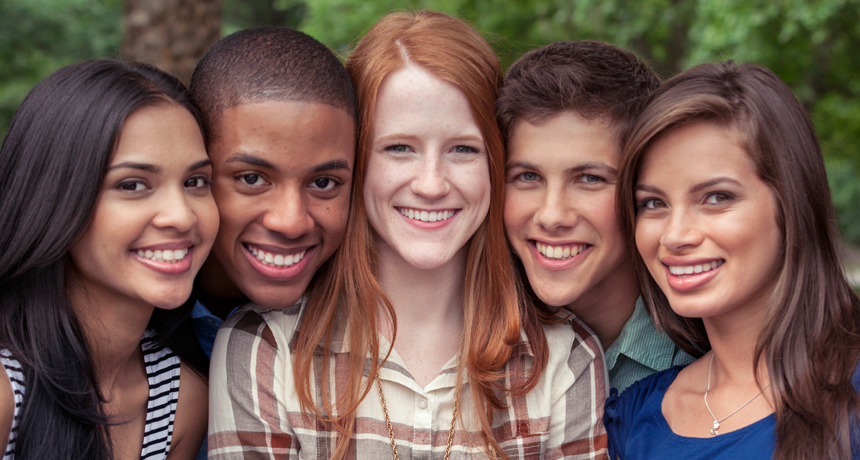

Los resultados de llamara nuestra API para preservar la privacidad serían:

- http://127.0.0.1:8000/?factor=10&url=https://www.sciencenewsforstudents.org/wp-content/uploads/2019/11/860_main_beauty.png

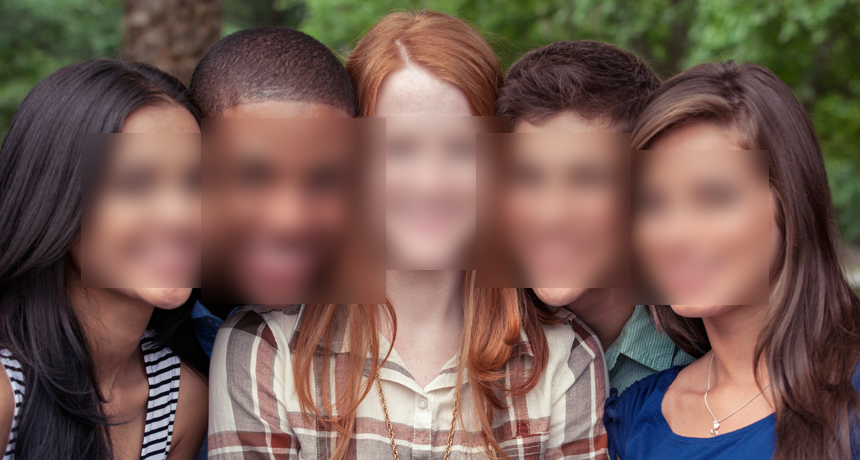

- http://127.0.0.1:8000/?factor=25&url=https://www.sciencenewsforstudents.org/wp-content/uploads/2019/11/860_main_beauty.png


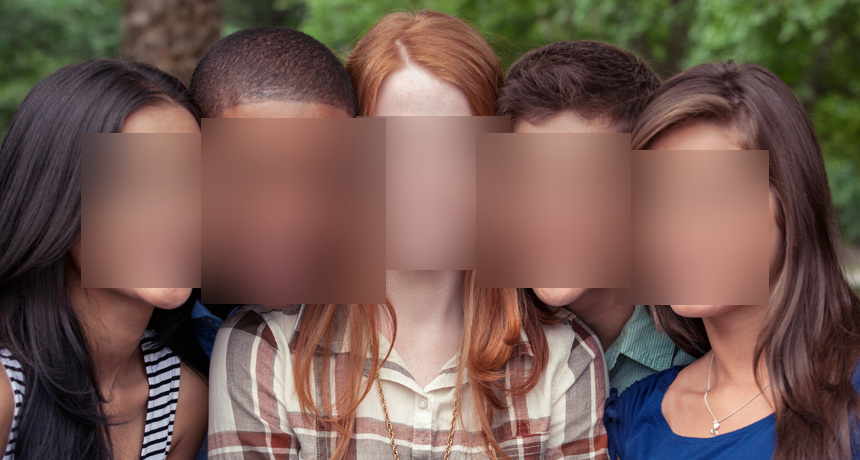

+ http://127.0.0.1:8000/?factor=10&url=https://teresaniubo.com/wp-content/uploads/2017/07/Candidate-Personas-1024x776.jpg

+ http://127.0.0.1:8000/?factor=10&url=https://psicologiamonzo.com/wp-content/uploads/2019/03/multiracial-grupo-joven-gente-toma-selfie_1139-1032.jpg